<a href="https://colab.research.google.com/github/SatyaKaruturi/Monty-Hall-Exercises/blob/master/Monty_Hall_Satya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monty Hall

**Ci-dessous une implémentation du jeux Monty Hall avec Python. Elle ne contient aucun commentaire.**

## Mission 1

Après avoir examiné le code ci-dessous, ajoute des commentaires **unilignes** et **multilignes** pour expliquer son fonctionnement à un autre développeur.

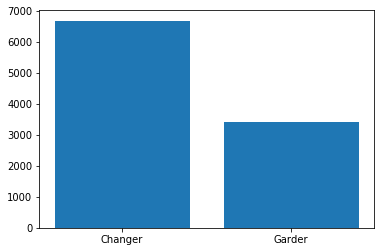

In [0]:
import matplotlib.pyplot as plt  # pour crée le plot

from random import randint #Ce module implémente des générateurs de nombres pseudo-aléatoires pour différentes distributions.



CHANGER = "changer" 
GARDER = "garder"

def jouerUnePartie(strategie): #crée le function pour fair le choisi changer et garder
  
    portes = [0, 1, 2] #no de portes
    
    bonne_porte = randint(0,2) 
    
    premier_choix = randint(0,2)
    
    portes.remove(premier_choix)
    
    if premier_choix == bonne_porte:   #Si le premier choix du joueur est la bonne_porte le programme va enlever l'une des deux portes restantes 
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]        #si le premier choix du joueur n'est pas la bonne_porte la porte egale index de la list equivallant de bonne porte
    
    deuxieme_choix = 0

    if strategie.lower() == "changer": #si le joueur choisi changer la porte deuxieme_choix egale de la porte
        deuxieme_choix = portes[0]
    elif strategie.lower() == "garder": 
        deuxieme_choix = premier_choix #si le joueur choisi garder la porte deuxieme_choix egale de la premier_choix
    else:
        raise ValueError("Stratégie non reconnue!") #si le joueur choisi un strategie differente le programme affiche une erreur
    
    return deuxieme_choix == bonne_porte


def jouerPlusieursParties(strategie, nb_tours): #crée deuxieme function pour counter le nombre de tour à tester
    
    return [1 if jouerUnePartie(strategie) else 0 for i in range(nb_tours)]

  
plot = plt.bar([1,2],[sum(jouerPlusieursParties("changer", 10000)), sum(jouerPlusieursParties("garder", 10000))], 
               tick_label=["Changer","Garder"]) #crée le bar plot avec the sum of changer et garder

# Mission 2

Pour m'assurer que tu as compris le code, dans une nouvelle cellule, modifie le code de la mission 1 pour ajouter entre les 2 batons une 3ème. Ce dernier portera le nom **"Alterner"**. Il s'agira du cas de figure ou le joueur alterne **aléatoirement** entre "changer" et "garder"


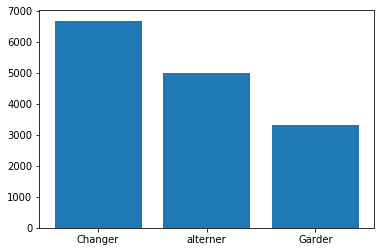

In [0]:
import matplotlib.pyplot as plt 

from random import randint 



CHANGER = "changer" 
GARDER = "garder"
ALTERNER = "alterner"

def jouerUnePartie(strategie): 
  
    portes = [0, 1, 2]
    
    bonne_porte = randint(0,2)
    
    premier_choix = randint(0,2)
   
    
    portes.remove(premier_choix)
    
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
    
    deuxieme_choix = 0
    
    
    if strategie.lower() == "alterner":
        new_strategie = randint(0,1)
        if new_strategie == 0:
          strategie = "garder"
        else:
          strategie = "changer"

    if strategie.lower() == "changer":
        deuxieme_choix = portes[0]
    elif strategie.lower() == "garder":
        deuxieme_choix = premier_choix
    else:
        raise ValueError("Stratégie non reconnue!")
    
    return deuxieme_choix == bonne_porte


def jouerPlusieursParties(strategie, nb_tours):
    
    return [1 if jouerUnePartie(strategie) else 0 for i in range(nb_tours)]

  
plot = plt.bar([1,2,3],[sum(jouerPlusieursParties("changer", 10000)),sum(jouerPlusieursParties("alterner", 10000)), sum(jouerPlusieursParties("garder", 10000))], 
               tick_label=["Changer","alterner","Garder"])

# Mission 3

Maintenant, il faut que tu recodes le jeu du Monty Hall en utilisant Numpy. **Tu ne dois utiliser les listes Python, la méthode random de Python, ni de boucle for ou while dans le code**. Numpy contient des mécanismes qui permettent d'arriver au même résultat.

Enfin, assemble les 2 fonctions, jouerUnePartie() et jouerPlusieursParties() dans une seule. Autrement dit, **ton programme Numpy ne contiendra qu'une seule fonction**. Évidemment, **le visuel devra être le même que la mission 2**.

<BarContainer object of 3 artists>

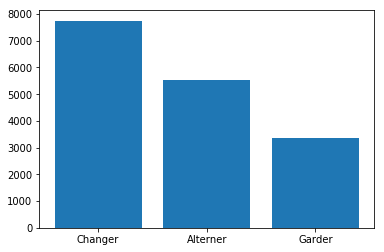

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from random import *

def jouer_unepartie(strategie):
  portes = [0, 1, 2]
  
  bonne_porte = np.random.randint(3, size = (1))
  
  premier_choix = np.random.randint(3, size = (1))
  
  portes_reste =np.delete(portes, premier_choix)
  
  if premier_choix == bonne_porte:
       portes.remove(portes[np.random.randint(0,1)])
  else:
       portes = [bonne_porte]
   
  choix2 = 0
  
  if premier_choix == bonne_porte:
        portes.remove(portes[np.random.randint(0,1)])
  else:
        portes = [bonne_porte]
    
  deuxieme_choix = 0
    
    
  if strategie.lower() == "alterner":
      new_strategie = randint(0,1)
      if new_strategie == 0:
          strategie = "garder"
      else:
          strategie = "changer"

  if strategie.lower() == "changer":
        deuxieme_choix = portes[0]
  elif strategie.lower() == "garder":
        deuxieme_choix = premier_choix
  else:
      raise ValueError("Stratégie non reconnue!")
    
  return deuxieme_choix == bonne_porte

vfunc = np.vectorize(jouer_unepartie)
changer  = vfunc(np.array(["changer"]*10000)).sum()   
alterner = vfunc(np.array(["alterner"]*10000)).sum() 
garder   = vfunc(np.array(["garder"]*10000)).sum()  

plt.bar([1,2,3],[changer, alterner, garder], tick_label=["Changer","Alterner","Garder"])